In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("nyc_taxi_trip_data_sample.csv.zip") # read data

We have already seen that we can use describe() to take a general picture of the values present in the DataFrame
Series ==> specific values of columns ( eg min,max,median )

In [ ]:
data['trip_distance'].count(), data['trip_distance'].min(), data['trip_distance'].max()

In [9]:
data['trip_distance'].mode() # Mode: Most frequent distance

0    1.0
dtype: float64

In [11]:
data['trip_distance'].value_counts() # Descending order of 1 mile most frequent distance

1.00     43414
0.90     38480
0.80     37655
1.10     37448
1.20     36056
         ...  
31.97        1
34.28        1
36.00        1
41.06        1
24.87        1
Name: trip_distance, Length: 3004, dtype: int64

In [12]:
# For example lets say we are interested in only the first 10 values
# Hence by using the already known slicing methon in python [:10]
data['trip_distance'].value_counts()[:10]

1.00     43414
0.90     38480
0.80     37655
1.10     37448
1.20     36056
         ...  
7.20      1357
2.64      1337
0.42      1331
2.61      1320
10.00     1313
Name: trip_distance, Length: 275, dtype: int64

We can see that the Length: 275 (not what we expected to get) 
In Pandas, in this case it will go through each row and try to find a label = 10
In order to select the first 10 lines we need to use iloc()

In [13]:
data['trip_distance'].value_counts().iloc[:10] # returning  the first 10 values

1.0    43414
0.9    38480
0.8    37655
1.1    37448
1.2    36056
0.7    34601
1.3    33994
1.4    32474
1.5    31080
0.6    30361
Name: trip_distance, dtype: int64

In [14]:
# Hence by using loc[] the result is based on the labels of value 10
data['trip_distance'].value_counts().loc[:10]

1.00     43414
0.90     38480
0.80     37655
1.10     37448
1.20     36056
         ...  
7.20      1357
2.64      1337
0.42      1331
2.61      1320
10.00     1313
Name: trip_distance, Length: 275, dtype: int64

We can now then try to design a histrogram

<AxesSubplot:>

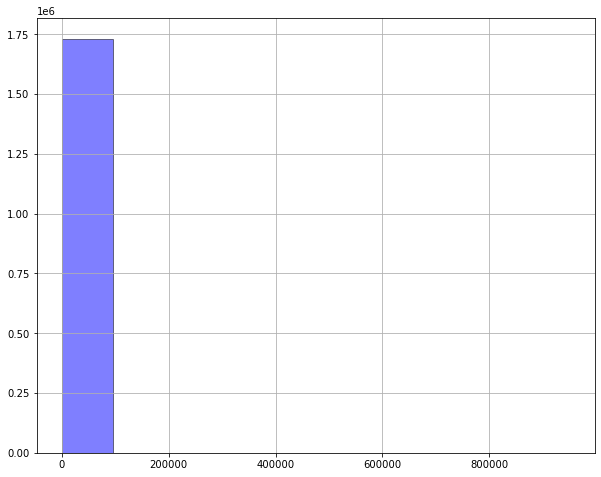

In [15]:
data.trip_distance.hist(color='blue', edgecolor='black', alpha=0.5, figsize=(10, 8))

We can see therefore that the result doesn't make sense since we are only getting a single bar.
The reason for that is due to the outliers.
What Pandas does ; is that it takes all the values and seperates them into small boxes.
Each box contains information of some distance in miles
In our case Pandas forms 10 different boxes. Since we have distance of upto 950k miles then the first box will contain the values from 0 < value < 95k
The next one will > 100k miles and so on
Most trips are under 95k miles hence what pandas does is that it concetrated all the data in the first box. And the rest boxes have few values inside

In [17]:
# Hence what we need to do is to concetrate the histogram for values 0 < value < 10 miles
# In order to do that we need to divide the boxes

np.linspace(0, 10, 100) # measure distance form 0 < values < 10 and break it into hundreads

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

We can see that the values are 0.101010 , 0.2020202 and so on
This is because of the way that computer calculate things.
In binary value of 1/10 cannot be represented accuratly on pc ( similar to 1/3 in decimal which correspnds to 0.333333 cannot be accuratly represented )

<AxesSubplot:>

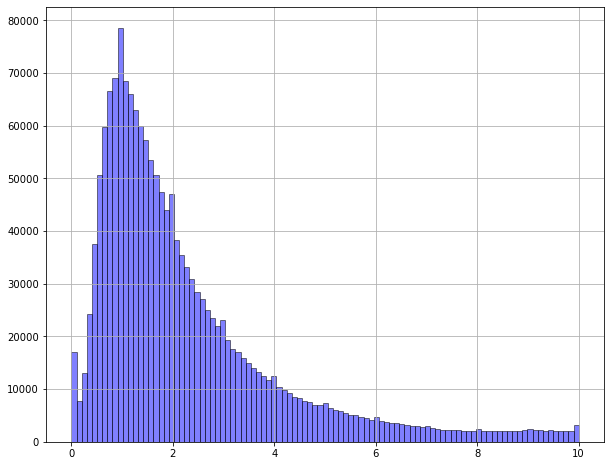

In [18]:
data.trip_distance.hist(bins=np.linspace(0, 10, 100), # design the histogram depending on our new data
                        color='blue', edgecolor='black', 
                        alpha=0.5, figsize=(10, 8))

We can see that there is a peak apprx distance of 1 mile. ( most popular )
We can also see that they are some other smaller peaks.
Investigating this case then:

In [19]:
data['trip_distance'].value_counts(bins=np.linspace(0, 10, 100)) # how many routes have been measured in the boxes

(0.909, 1.01]     78629
(0.808, 0.909]    68974
(1.01, 1.111]     68413
(0.707, 0.808]    66525
(1.111, 1.212]    66112
                  ...  
(9.697, 9.798]     2022
(7.879, 7.98]      2005
(8.485, 8.586]     2005
(8.283, 8.384]     1990
(9.798, 9.899]     1974
Name: trip_distance, Length: 99, dtype: int64

In order to find the smaller peaks , we need to compare the column to the next one (find the greater)
But our result from running the previous code ; displays the routes based on descending order of how popular that route is
We need though to be in order as the histogram

In [20]:
# Hence sort data depending on popularity and then sort data based on their index (sort.index)
trip_distance_counts = data['trip_distance'].value_counts(bins=np.linspace(0, 10, 100)).sort_index()
trip_distance_counts

(-0.001, 0.101]    16986
(0.101, 0.202]      7730
(0.202, 0.303]     13104
(0.303, 0.404]     24169
(0.404, 0.505]     37491
                   ...  
(9.495, 9.596]      2137
(9.596, 9.697]      2030
(9.697, 9.798]      2022
(9.798, 9.899]      1974
(9.899, 10.0]       3214
Name: trip_distance, Length: 99, dtype: int64

Hence we need to compare the values found in the second column

In [21]:
from scipy.signal import find_peaks # Comparing distances with their neighbours values

peaks, _ = find_peaks(trip_distance_counts)
peaks

# Shows an array of peaks

array([ 9, 19, 29, 39, 49, 59, 69, 79, 83, 89, 93], dtype=int64)

In [22]:
# Since we have now the peaks
trip_distance_counts.iloc[peaks] # use iloc retrieve the positions of peaks

(0.909, 1.01]     78629
(1.919, 2.02]     46971
(2.929, 3.03]     23081
(3.939, 4.04]     12562
(4.949, 5.051]     7332
(5.96, 6.061]      4756
(6.97, 7.071]      3025
(7.98, 8.081]      2343
(8.384, 8.485]     2025
(8.99, 9.091]      2425
(9.394, 9.495]     2153
Name: trip_distance, dtype: int64

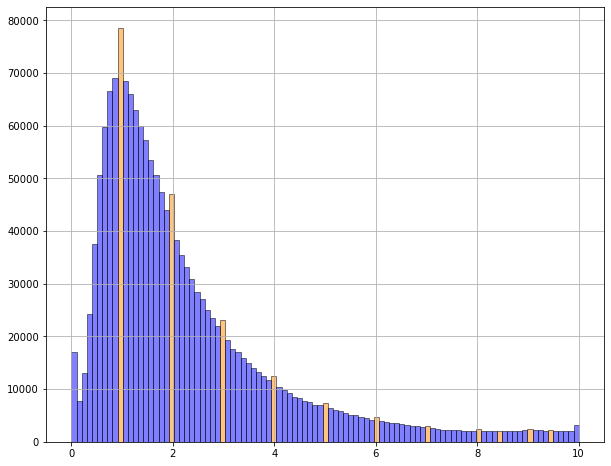

In [23]:
# We can see that the peaks correspond to routes with approximate values ( 1,2,.....,8 miles)
ax = data.trip_distance.hist(bins=np.linspace(0, 10, 100), 
                             color='blue', edgecolor='black', 
                             alpha=0.5, figsize=(10, 8))
for i in peaks:
    ax.patches[i].set_facecolor('darkorange') # patches = peak bars